# K-means

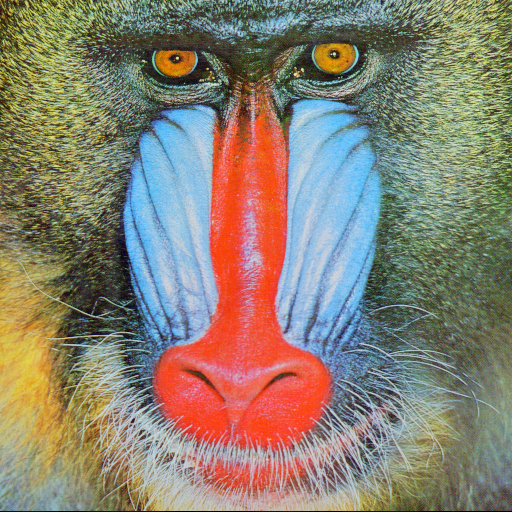

(262144, 3)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin
import pandas as pd
from PIL import Image
from IPython.display import display
import requests
from io import BytesIO


import urllib.request 
from PIL import Image 
  
urllib.request.urlretrieve( 
  'https://github.com/Neermita18/Pattern-Recognition-and-Machine-Learning-23-24/blob/main/test.png?raw=true', 
   "test.png") 
  
image = Image.open("test.png") 
# image.show()

display(image)
image_np = np.array(image)

image_reshaped = image_np.reshape(-1, 3)
print(image_reshaped.shape)

    # Shuffle the pixels
image_reshaped_sample = shuffle(image_reshaped, random_state=0)[:image_reshaped.shape[0]]

## Task-1 (a) 
Implement a function – computeCentroid, that takes n 3-dimensional features and returns their mean. (2 pts)


In [22]:
def computeCentroid(imager):
    df= pd.DataFrame(imager)
    print(df)
    c1= df[0].mean()
    c2= df[1].mean()
    c3= df[2].mean()
    centroid= [c1, c2, c3]
    sum1= df[0].sum()
    print(sum1)
    print(f"Centroid is {centroid}")
    return centroid
    c= np.mean(image_reshaped, axis=0)
    print(f"Centroid from another function {c}")
computeCentroid(image_reshaped)
print(image_reshaped.size)

          0    1   2
0       164  150  71
1        63   57  31
2        75   43  10
3        95   94  46
4       157  140  73
...     ...  ...  ..
262139    3    5   6
262140    2    5   3
262141    5    8   5
262142    2    5   0
262143    4    5   2

[262144 rows x 3 columns]
36016314
Centroid is [137.3913345336914, 128.8587760925293, 113.11710739135742]
786432


In [23]:
def computeCentroidforspatial(imager):   
    return np.mean(imager, axis=0)

## Task-2 (b) 
Implement a function – mykmeans from scratch that takes data matrix X of size m×3 where m is the number of pixels in the image and the number of clusters k. It returns the cluster centers using the k-means algorithm. (3pts)

In [24]:
def mykmeans(X, k, threshold=1e-4):
    print(X.shape)
    
    randcentroids = X[np.random.choice(X.shape[0], k, replace=False)]
    # print(randcentroids)
    
    for _ in range(1000):
        #find centroid closest to each data point
        labels= pairwise_distances_argmin(X, randcentroids)
        
        # Update randcentroids
        #new_randcentroids = np.array([computeCentroid(X[labels == i]) for i in range(k)])
        new_randcentroids = np.array([computeCentroidforspatial(X[labels == i]) for i in range(k)])
        #thresholding?? 
        # Check for convergence
        if np.allclose(randcentroids, new_randcentroids, atol= threshold):
            break
        
        randcentroids = new_randcentroids
    
    return randcentroids, labels
   

## Task-3 (c) 
Use the centroids of k-means to represent the pixels of the image. Now, show compressed images for different values of k. (1 pts)

In [26]:
print(image_reshaped.shape)

centroidsf, labels= mykmeans(image_reshaped,10, threshold=1e-4)

(262144, 3)
(262144, 3)


In [29]:
print(centroidsf)
print(labels)
# labels = pairwise_distances_argmin(image_reshaped, centroidsf)

#Replace pixel values with centroids
compressed_pixels = centroidsf[labels][:, :3]

print(compressed_pixels.shape)

print(compressed_pixels)

[[138.01595623 129.18221474  80.06045764]
 [193.80679644 167.77255031  79.88307489]
 [ 54.35577579  51.07206195  43.73129238]
 [179.93752857 169.90621667 142.77803596]
 [233.28797971  83.27252747  57.90153846]
 [123.73684604 149.16584454 147.36057549]
 [125.22756461 184.23862375 225.38159981]
 [ 86.5664796   89.063188    65.36299374]
 [177.33929797 193.85148472 202.671816  ]
 [ 96.67692529 115.56016433 108.995171  ]]
[0 2 2 ... 2 2 2]
(262144, 3)
[[138.01595623 129.18221474  80.06045764]
 [ 54.35577579  51.07206195  43.73129238]
 [ 54.35577579  51.07206195  43.73129238]
 ...
 [ 54.35577579  51.07206195  43.73129238]
 [ 54.35577579  51.07206195  43.73129238]
 [ 54.35577579  51.07206195  43.73129238]]


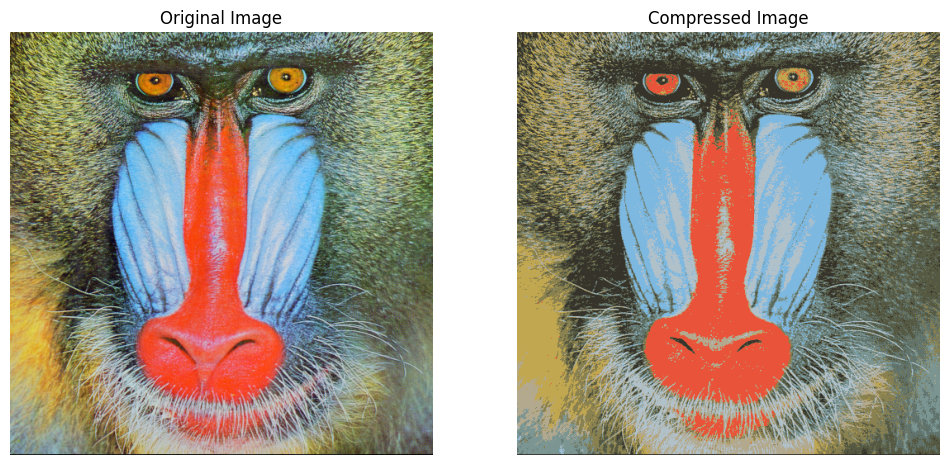

In [30]:
reconstructed_image = compressed_pixels.reshape(image_np.shape)
compressed_image = reconstructed_image.astype(np.uint8)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].set_title("Compressed Image")
ax[1].imshow(compressed_image )
    
ax[1].axis('off')

plt.show()

## Task-4 (d) 
Show the results of compressed images using the k-means implementation of the sklearn library. What differences do you observe? (2 pts)

C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


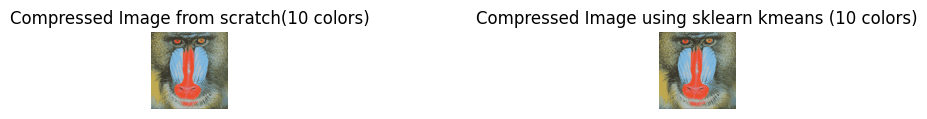

In [52]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(image_reshaped_sample)
ls = kmeans.predict(image_reshaped)
cs = kmeans.cluster_centers_

    # Replace each pixel with its corresponding centroid color
ci= cs[ls]

    # Reshape the compressed image back to its original shape
ci = ci.reshape(image_np.shape)

    # Convert the compressed image array to uint8 data type
ci= ci.astype(np.uint8)

    # Display the original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(12, 1))
ax[0].imshow(compressed_image)
ax[0].set_title('Compressed Image from scratch({} colors)'.format(10))
ax[0].axis('off')

ax[1].imshow(ci)
ax[1].set_title('Compressed Image using sklearn kmeans ({} colors)'.format(10))
ax[1].axis('off')

plt.show()

## Task 5-(e) Spatial coherence: 
Incorporating spatial information helps maintain spatial coherence in the compressed image. Pixels that are nearby in the original image are more likely to be assigned to the same cluster, preserving local structures and reducing artifacts like color bleeding or noise. How do you implement spatial coherence? Write the idea, implement it, and write down your observations. (2 pts)

In [53]:
def add_spatial_features(image_np, scale=0.1):
    print(image_np.shape)
    m, n, _ = image_np.shape
    X, Y = np.meshgrid(range(n), range(m))
    features = np.c_[image_np.reshape(-1, 3), scale * X.flatten(), scale * Y.flatten()]
    return features

(262144, 3)
(512, 512, 3)
(262144, 5)
[[ 84.67459678  91.26146015  71.35321923  31.31789471  21.86535335]
 [130.87513376 187.36124128 226.7732925   25.85833733  21.13655585]
 [139.77111255 121.70748842  69.09924767  13.95542823  25.94745653]
 [194.53216944 169.27613549  79.78069138   6.14779161  29.87121096]
 [109.39018712 125.73920731 109.40928245  37.18747016  26.7227759 ]
 [115.66083083 148.50051797 161.69025174  28.64496012  25.75447011]
 [171.95470094 164.87854601 135.27956878  25.14441104  28.07196365]
 [181.4531851  191.84604979 193.72409858  27.02728157  31.6330008 ]
 [233.87258333  83.46739832  58.35139819  24.52367911  31.52780741]
 [ 56.2865931   52.60129744  43.85146522  19.34425844  16.40836627]]
[2 9 9 ... 9 9 9]
(262144, 3)
[[139.77111255 121.70748842  69.09924767]
 [ 56.2865931   52.60129744  43.85146522]
 [ 56.2865931   52.60129744  43.85146522]
 ...
 [ 56.2865931   52.60129744  43.85146522]
 [ 56.2865931   52.60129744  43.85146522]
 [ 56.2865931   52.60129744  43.8514

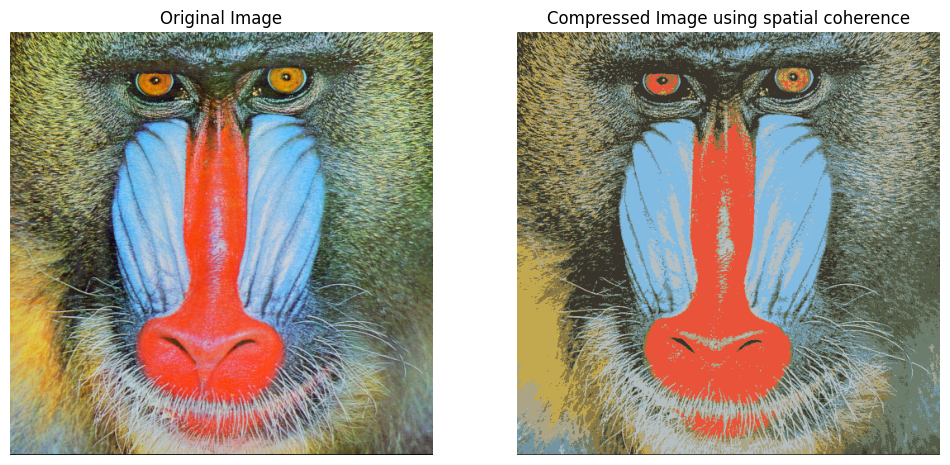

In [54]:
print(image_reshaped.shape)
spacial_features = add_spatial_features(image_np)
# centroidsf, labels= mykmeans(image_reshaped,3, threshold=1e-4)
centroidss, labelss= mykmeans(spacial_features,10, threshold=1e-4)

print(centroidss)
print(labelss)
# labels = pairwise_distances_argmin(image_reshaped, centroidsf)

#Replace pixel values with centroids
compressed_pixels_sp = centroidss[labelss][:, :3]

print(compressed_pixels_sp.shape)

print(compressed_pixels_sp)
# compressed_pixels = np.array([centroidsf[label] for label in labels])


reconstructed_image_sp = compressed_pixels_sp.reshape(image_np.shape)
compressed_image_sp = reconstructed_image_sp.astype(np.uint8)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].set_title("Compressed Image using spatial coherence")
ax[1].imshow(compressed_image_sp )
    
ax[1].axis('off')

plt.show()

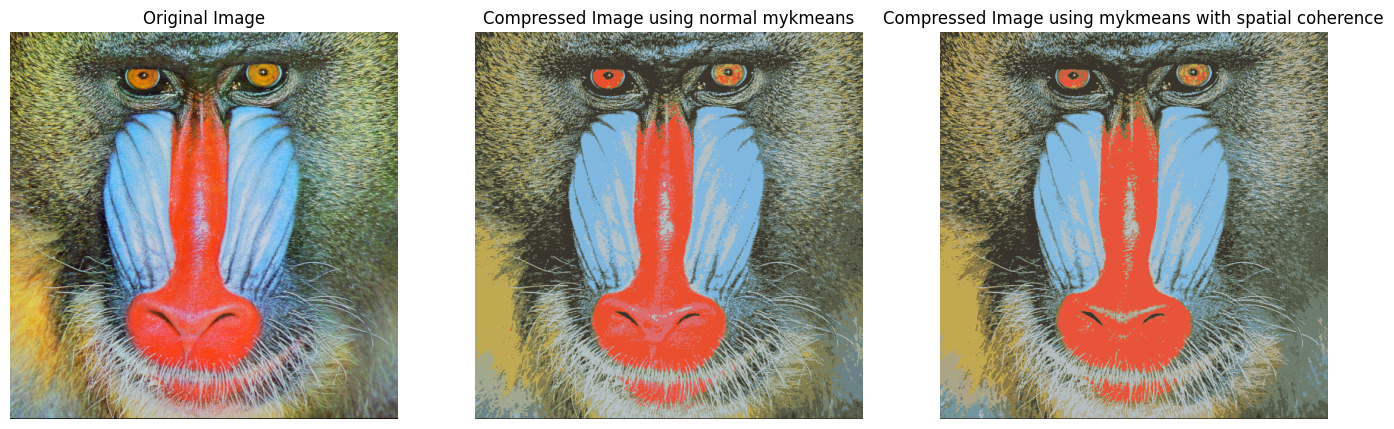

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(17, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].set_title("Compressed Image using normal mykmeans")
ax[1].imshow(compressed_image )
    
ax[1].axis('off')
ax[2].set_title("Compressed Image using mykmeans with spatial coherence")
ax[2].imshow(compressed_image_sp)
    
ax[2].axis('off')
plt.show()

# Support Vector Machines

## Task 1-(a): 
Load the Iris dataset using the following code: from sklearn import datasets iris = datasets.loadiris(asframe=True) For this problem, focus only on the petal length and petal width features. Create a new dataset by selecting only two classes, ‘setosa’ and ‘versicolor’ for binary classification. Normalize the dataset, and split it into train and test by choosing an appropriate split ratio. (2 pts)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

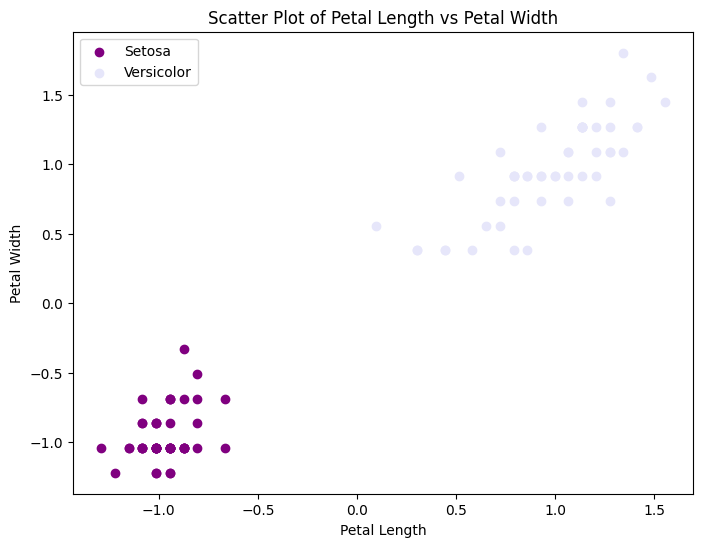

In [56]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.svm import SVC
iris = datasets.load_iris( as_frame=True )
#TASK 1 (a)
# print(iris) 
#linear classifier. Good for complexity, can throw away most training samples, only need support vectors. SVM doesnt allow noise. To deal with that we use Slack variable. 
data= iris.data
targets =pd.DataFrame({'species':iris.target})

print(data)
df= pd.DataFrame(data)
print(df)
print(df.columns)
da= df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
print(da)
da= pd.concat([da, targets], axis=1)
print(da)
da= da[(da['species'] == 0) | (da['species'] == 1)]

print(da)

yo = da['species'] 
Xo = da.drop(columns=['species']) 
 # Target variable

scaler = StandardScaler()
X_normalized = scaler.fit_transform(Xo)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, yo, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#plotting the data nicely
plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[yo == 0, 0], X_normalized[yo == 0, 1], label='Setosa', color='purple')  #petal length vs petal width for Setosa
plt.scatter(X_normalized[yo == 1, 0], X_normalized[yo == 1, 1], label='Versicolor', color='lavender')  #petal length vs petal width for Versicolor

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs Petal Width')

plt.legend()

plt.show()

In [63]:
print(X_train)

[[ 1.13639313  0.91406997]
 [ 0.85905497  0.91406997]
 [-0.87430856 -0.68644165]
 [-1.08231219 -1.04211089]
 [ 0.72038588  0.55840072]
 [-0.94364311 -0.68644165]
 [-1.08231219 -0.86427627]
 [ 0.92838951  0.91406997]
 [-0.94364311 -1.21994552]
 [ 1.4137313   1.26973921]
 [-0.87430856 -1.04211089]
 [-1.01297765 -1.04211089]
 [ 1.13639313  1.44757384]
 [-1.01297765 -1.04211089]
 [ 0.30437864  0.38056609]
 [-0.80497402 -0.68644165]
 [ 1.13639313  1.26973921]
 [ 1.06705859  1.09190459]
 [-1.15164673 -1.04211089]
 [-1.08231219 -0.68644165]
 [-1.01297765 -1.04211089]
 [-0.94364311 -1.04211089]
 [-0.94364311 -1.04211089]
 [ 0.92838951  0.73623534]
 [-0.94364311 -1.04211089]
 [-0.94364311 -0.86427627]
 [ 0.5817168   0.38056609]
 [-0.87430856 -1.04211089]
 [ 0.78972042  0.38056609]
 [-1.22098127 -1.21994552]
 [-0.66630494 -1.04211089]
 [-0.94364311 -1.04211089]
 [-1.01297765 -0.86427627]
 [-1.08231219 -1.04211089]
 [-1.01297765 -1.04211089]
 [ 1.13639313  1.26973921]
 [-1.01297765 -0.86427627]
 

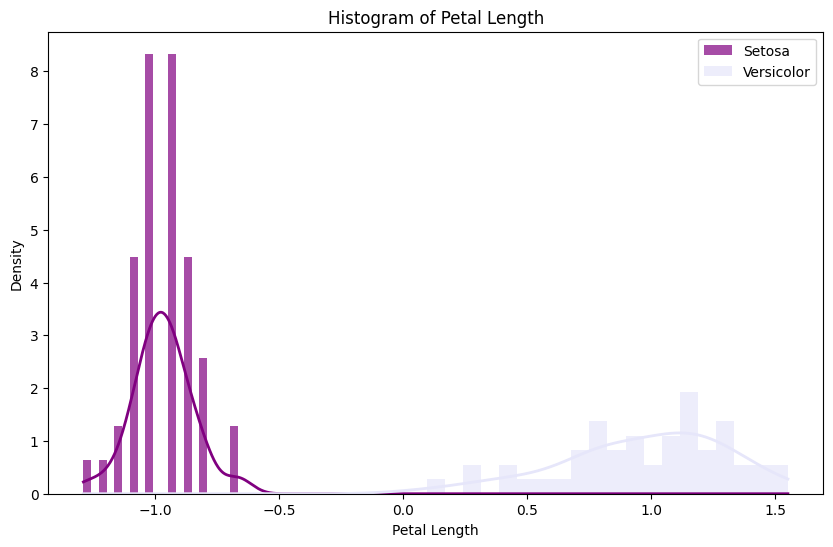

In [61]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(10, 6))


plt.hist(X_normalized[yo == 0, 0], bins=20, density=True, color='purple', alpha=0.7, label='Setosa')

plt.hist(X_normalized[yo == 1, 0], bins=20, density=True, color='lavender', alpha=0.7, label='Versicolor')

#Kernel Density Estimation (KDE) for Setosa

kde_setosa = gaussian_kde(X_normalized[yo == 0, 0])
kde_x = np.linspace(min(X_normalized[:, 0]), max(X_normalized[:, 0]), 1000)
plt.plot(kde_x, kde_setosa(kde_x), color='purple', linestyle='-', linewidth=2)

#Kernel Density Estimation (KDE) for Versicolor
kde_versicolor = gaussian_kde(X_normalized[yo == 1, 0])
plt.plot(kde_x, kde_versicolor(kde_x), color='lavender', linestyle='-', linewidth=2)

plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Density')
plt.legend()

plt.show()



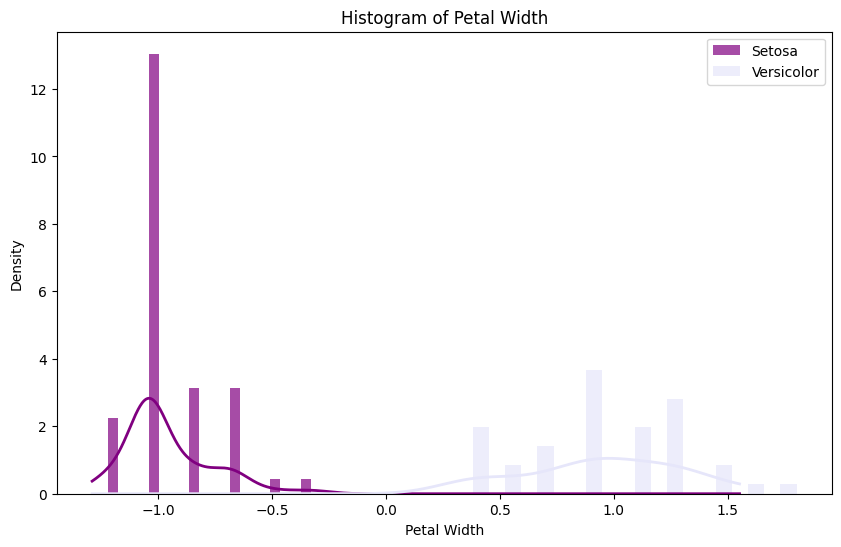

In [64]:
plt.figure(figsize=(10, 6))


plt.hist(X_normalized[yo == 0, 1], bins=20, density=True, color='purple', alpha=0.7, label='Setosa')

plt.hist(X_normalized[yo == 1, 1], bins=20, density=True, color='lavender', alpha=0.7, label='Versicolor')

#Kernel Density Estimation (KDE) for Setosa

kde_setosa = gaussian_kde(X_normalized[yo == 0, 1])
kde_x = np.linspace(min(X_normalized[:, 0]), max(X_normalized[:, 0]), 1000)
plt.plot(kde_x, kde_setosa(kde_x), color='purple', linestyle='-', linewidth=2)

#Kernel Density Estimation (KDE) for Versicolor
kde_versicolor = gaussian_kde(X_normalized[yo == 1, 1])
plt.plot(kde_x, kde_versicolor(kde_x), color='lavender', linestyle='-', linewidth=2)

plt.title('Histogram of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Density')
plt.legend()

plt.show()

## Task-1 (b): 
Train a Linear Support Vector Classifier (LinearSVC) on the training data. Plot the decision boundary of the model on the train data, and also generate another plot showing a scatterplot of the test data along with the original decision boundary. (3 pts)

C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


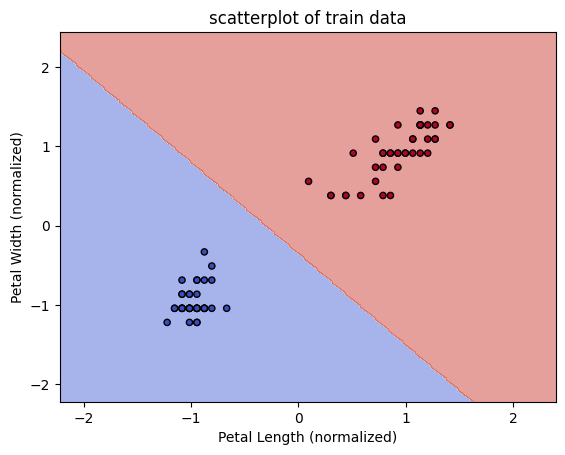

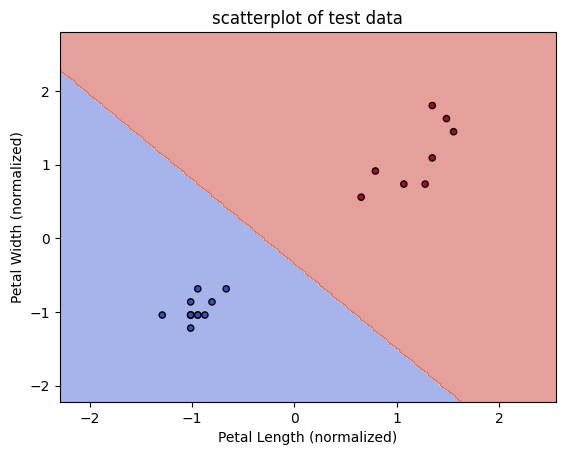

In [65]:
clf = LinearSVC()
clf.fit(X_train, y_train)

#Function to plot decision boundary
def db(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #added +=1 because points not seen otherwise
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #the decision boundary. xx and yy are flattened arrays
    
    
    Z = Z.reshape(xx.shape)
    
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    
    plt.xlabel('Petal Length (normalized)')
    plt.ylabel('Petal Width (normalized)')
    
    plt.title(title)
    plt.show()


db(clf, X_train, y_train, title="scatterplot of train data")


plt.figure()
db(clf, X_test, y_test, title='scatterplot of test data')

## Task-2 (a): 
Generate a synthetic dataset using the make moons() function from scikit-learn. Take around 500 data points, and add 5% noise (misclassifications) to the dataset. (1 pts)

In [66]:
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

#add noise
noise= int(0.05 * len(y))
np.random.seed(42)
noise_indices = np.random.choice(len(y), noise, replace=False)
y[noise_indices] = 1 - y[noise_indices] 

#Verifying the shape of the dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (500, 2)
Shape of y: (500,)


## Task-2 (b): 
Implement SVM models with three different kernels: Linear, Polynomial, and RBF. Plot the decision boundaries for each kernel on the synthetic dataset. Analyze and comment on the differences in decision boundaries produced by these kernels. (5 pts) 

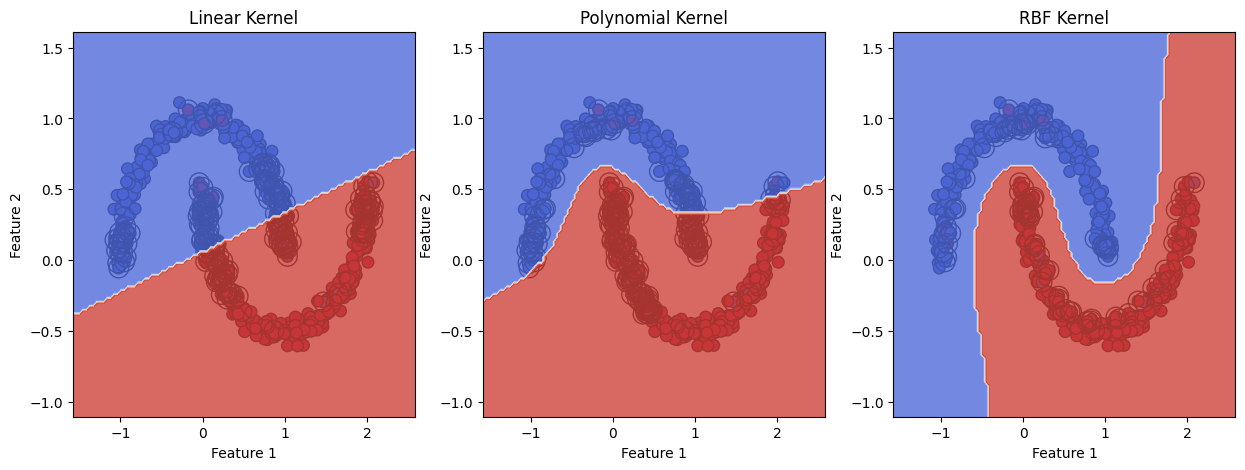

In [68]:
kernels = ['linear', 'poly', 'rbf']
kernel_names = ['Linear', 'Polynomial', 'RBF']

plt.figure(figsize=(15, 5))

for i, kernel in enumerate(kernels):
    # Train SVM model with specified kernel
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X, y)
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=70, edgecolors='k')
    
    #Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='k')
    
    # Create meshgrid to plot decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
                         np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    plt.title(f'{kernel_names[i]} Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

<Figure size 640x480 with 0 Axes>

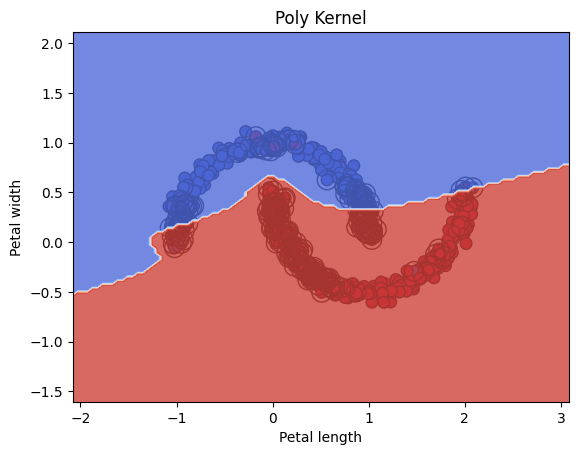

In [67]:
# FOR POLY with degree param
plt.tight_layout()
plt.show()
clpoly = SVC(kernel='poly', random_state=42, degree= 5) #change the degree
clpoly.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=70, edgecolors='k')
    
    #Plot support vectors
plt.scatter(clpoly.support_vectors_[:, 0], clpoly.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='k')
    
    # Create meshgrid to plot decision boundary
xxp, yyp = np.meshgrid(np.linspace(X[:, 0].min() -1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() -1, X[:, 1].max() + 1, 100))
Zp = clpoly.predict(np.c_[xxp.ravel(), yyp.ravel()])
Zp = Zp.reshape(xxp.shape)
plt.contourf(xxp, yyp, Zp, cmap=plt.cm.coolwarm, alpha=0.8)
    
plt.title(f'Poly Kernel')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

## Task-2 (c): 
Focus on the RBF kernel SVM model. Perform hyperparameter tuning to find the best values of gamma and C for this model. You can use techniques like grid search or random search. (2 pts)

In [69]:
from sklearn.model_selection import GridSearchCV
svm_rbf = SVC(kernel='rbf')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 2],
              'gamma': [1, 2, 3, 4, 5, 7, 8, 9, 10, 20, 30, 50]}

grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'C': 0.1, 'gamma': 3}


## Task-2 (d): 
Plot the decision boundary for the RBF kernel SVM with the best Hyperparameters. Explain the impact of the selected gamma and C values on the model’s performance and decision boundary. Note: Ensure to complete each task thoroughly and document your findings in the lab report. (2 pts)

Model Accuracy: 0.95


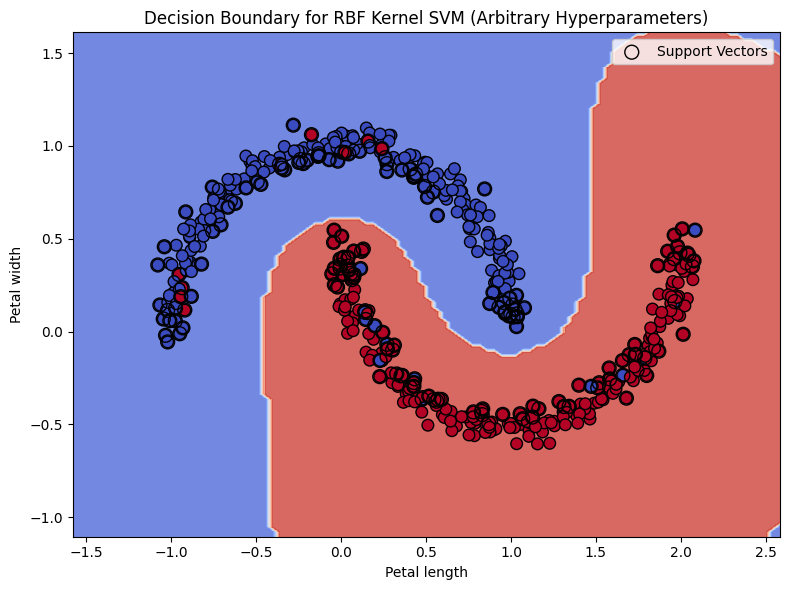

In [70]:
best_C = 0.1 #tweak these for various plots
best_gamma = 3
svm_rbf_best = SVC(kernel='rbf', gamma=best_gamma, C=best_C, random_state=42)

# Train the SVM model with the best hyperparameters
svm_rbf_best.fit(X, y)
accuracy = svm_rbf_best.score(X, y)

# Print the accuracy
print("Model Accuracy:", accuracy)
# Plot decision boundary for the RBF kernel SVM with the best hyperparameters
plt.figure(figsize=(8, 6))

# Plot training data
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Training Data')

# # Plot testing data
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, marker='s', edgecolors='k', label='Testing Data')

# Create meshgrid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
                     np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100))
Z = svm_rbf_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=70, edgecolors='k')
# Plot support vectors
plt.scatter(svm_rbf_best.support_vectors_[:, 0], svm_rbf_best.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('Decision Boundary for RBF Kernel SVM (Arbitrary Hyperparameters)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

plt.tight_layout()
plt.show()